# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 2. Load Dataset

In [5]:
df = pd.read_csv('DATASET CYBERBULLYING INSTAGRAM - FINAL.csv')

In [6]:
df.head()

,Komentar,Kategori,Unnamed: 2,Unnamed: 3
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",Non-bullying,NaN,NaN
1,"""makan nasi padang aja begini badannya""",Non-bullying,NaN,NaN
2,"""yang aku suka dari dia adalah selalu cukur je...",Bullying,NaN,NaN
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",Non-bullying,NaN,NaN
4,"""Manusia apa bidadari sih herann deh cantik te...",Non-bullying,NaN,NaN


# 3. Exploratory Data Analysis (EDA)
# ------------------------------------------
# Cek jumlah data dan missing values

In [7]:
print("Jumlah data:", df.shape)
print("Jumlah missing values:\n", df.isnull().sum())

Jumlah data: (650, 4)
Jumlah missing values:
 Komentar        0
Kategori        0
Unnamed: 2    650
Unnamed: 3    649
dtype: int64


# Distribusi label

<ipython-input-9-534710af667e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kategori', palette='Set2')


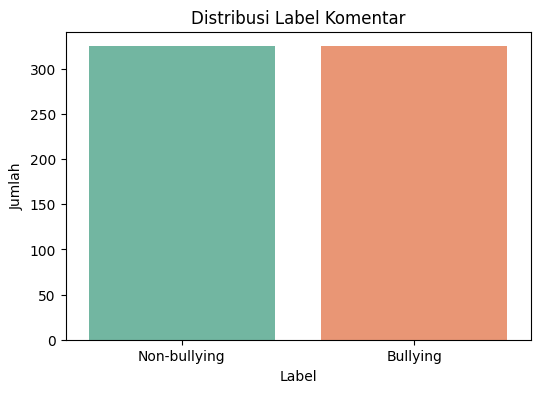

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Kategori', palette='Set2')
plt.title("Distribusi Label Komentar")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [11]:
df['length'] = df['Komentar'].astype(str).apply(len)

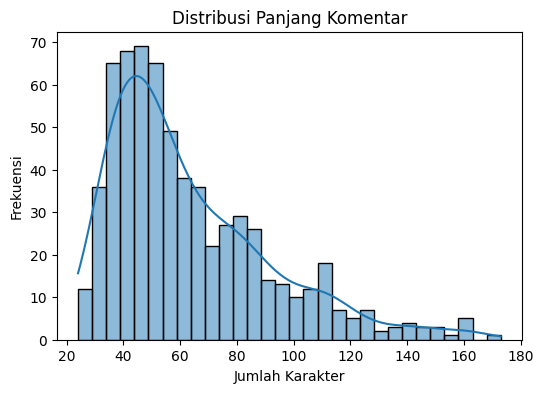

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['length'], bins=30, kde=True)
plt.title("Distribusi Panjang Komentar")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show()

# Normalisasi kolom label

In [18]:
df['Kategori'] = df['Kategori'].astype(str).str.strip().str.lower()

# Contoh komentar bullying dan non-bullying

In [20]:
print("\nContoh komentar bullying:")
print(df[df['Kategori'] == 'bullying']['Komentar'].head())


Contoh komentar bullying:
2    "yang aku suka dari dia adalah selalu cukur je...
5    "@ayu.kinantii isyan skrg berubah ya:( baju ny...
7    "Makin jelek aja anaknya, padahal ibu ayahnya ...
8    "Kok anaknya kayak udah tua gitu ya mukanya kk...
9    "Muka anak nya ko tua banget yaa.. GK ngegemes...
Name: Komentar, dtype: object


In [22]:
print("\nContoh komentar non-bullying:")
print(df[df['Kategori'] == 'non-bullying']['Komentar'].head())


Contoh komentar non-bullying:
0          "Kaka tidur yaa, udah pagi, gaboleh capek2"
1              "makan nasi padang aja begini badannya"
3    "Hai kak Isyana aku ngefans banget sama kak Is...
4    "Manusia apa bidadari sih herann deh cantik te...
6    "Gemesnya isyan kayak tango, berlapis lapis ci...
Name: Komentar, dtype: object


# 4. Preprocessing Teks

In [23]:
stop_words = set(stopwords.words('indonesian'))  # Bahasa Indonesia
stemmer = PorterStemmer()

In [24]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # hapus URL
    text = re.sub(r'\@[\w]*', '', text)  # hapus mention
    text = re.sub(r'\#', '', text)  # hapus #
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # hapus angka dan simbol
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
df['clean_text'] = df['Komentar'].astype(str).apply(preprocess)

In [29]:
df.head()

,Komentar,Kategori,Unnamed: 2,Unnamed: 3,length,clean_text
0,"""Kaka tidur yaa, udah pagi, gaboleh capek2""",non-bullying,NaN,NaN,43,kaka tidur yaa udah pagi gaboleh capek
1,"""makan nasi padang aja begini badannya""",non-bullying,NaN,NaN,39,makan nasi padang aja badannya
2,"""yang aku suka dari dia adalah selalu cukur je...",bullying,NaN,NaN,68,suka cukur jembut manggung
3,"""Hai kak Isyana aku ngefans banget sama kak Is...",non-bullying,NaN,NaN,111,hai kak isyana ngefan banget kak isyanaaku suk...
4,"""Manusia apa bidadari sih herann deh cantik te...",non-bullying,NaN,NaN,54,manusia bidadari sih herann deh cantik


# 5. Vectorization

In [28]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['Kategori']

# 6. Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training - Naive Bayes, Logistic Regression,SVM

In [37]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

# 8. Evaluation


--- Model: Naive Bayes ---
Akurasi: 83.08 %
Classification Report:
               precision    recall  f1-score   support

    bullying       0.80      0.85      0.83        62
non-bullying       0.86      0.81      0.83        68

    accuracy                           0.83       130
   macro avg       0.83      0.83      0.83       130
weighted avg       0.83      0.83      0.83       130



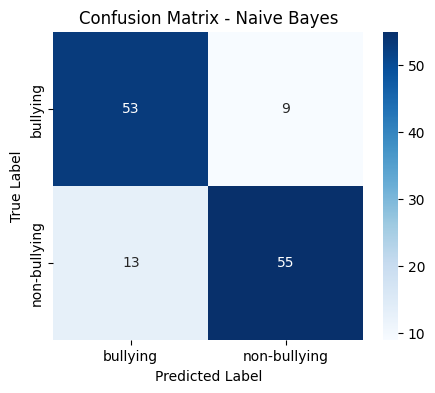


--- Model: Logistic Regression ---
Akurasi: 83.08 %
Classification Report:
               precision    recall  f1-score   support

    bullying       0.81      0.84      0.83        62
non-bullying       0.85      0.82      0.84        68

    accuracy                           0.83       130
   macro avg       0.83      0.83      0.83       130
weighted avg       0.83      0.83      0.83       130



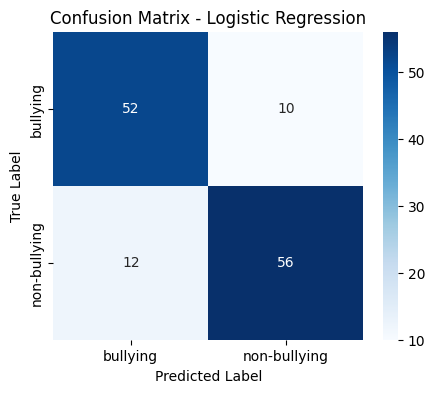


--- Model: SVM ---
Akurasi: 84.62 %
Classification Report:
               precision    recall  f1-score   support

    bullying       0.84      0.84      0.84        62
non-bullying       0.85      0.85      0.85        68

    accuracy                           0.85       130
   macro avg       0.85      0.85      0.85       130
weighted avg       0.85      0.85      0.85       130



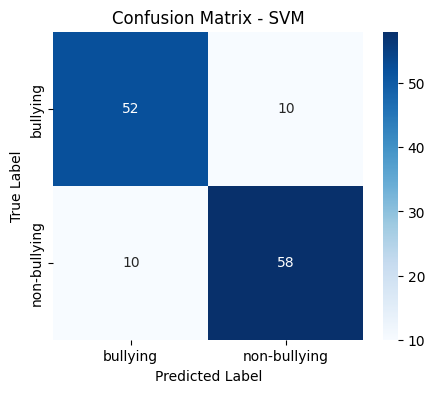

In [38]:
for name, model in models.items():
    print(f"\n--- Model: {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Akurasi:", round(acc * 100, 2), "%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=["bullying", "non-bullying"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["bullying", "non-bullying"], yticklabels=["bullying", "non-bullying"])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()